In [1]:
import pandas as pd


In [2]:

# Replace 'filename.csv' with your file path
df = pd.read_csv('test_results.csv')
df["total_duration"] = df.fit_duration + df.transform_duration

df

,transformer,num_samples,fit_duration,transform_duration,total_duration
0,NP,1000,0.010632,0.010513,0.021145
1,NumbaV0,1000,0.012851,3.401572,3.414423
2,NumbaV1,1000,2.312726,1.112573,3.425300
3,Cython,1000,0.010523,0.004389,0.014912
4,NP,10000,0.022644,0.086969,0.109613
5,NumbaV0,10000,0.015666,3.388069,3.403735
6,NumbaV1,10000,2.248147,1.129014,3.377162
7,Cython,10000,0.013263,0.044089,0.057351
8,NP,100000,0.060723,1.141641,1.202364
9,NumbaV0,100000,0.061375,3.617681,3.679056


In [3]:
results = []
for grp in df.groupby('num_samples'):
    df_g = grp[1]
    print(df_g)
    df_g["total_speedup"] = df_g[df_g.transformer == "NP"]["total_duration"].values[0] / df_g["total_duration"]
    results.append(df_g)

results_df = pd.concat(results)
results_df = results_df[results_df.num_samples != 1000]
results_df

  transformer  num_samples  fit_duration  transform_duration  total_duration
0          NP         1000      0.010632            0.010513        0.021145
1     NumbaV0         1000      0.012851            3.401572        3.414423
2     NumbaV1         1000      2.312726            1.112573        3.425300
3      Cython         1000      0.010523            0.004389        0.014912
  transformer  num_samples  fit_duration  transform_duration  total_duration
4          NP        10000      0.022644            0.086969        0.109613
5     NumbaV0        10000      0.015666            3.388069        3.403735
6     NumbaV1        10000      2.248147            1.129014        3.377162
7      Cython        10000      0.013263            0.044089        0.057351
   transformer  num_samples  fit_duration  transform_duration  total_duration
8           NP       100000      0.060723            1.141641        1.202364
9      NumbaV0       100000      0.061375            3.617681        3.679

,transformer,num_samples,fit_duration,transform_duration,total_duration,total_speedup
4,NP,10000,0.022644,0.086969,0.109613,1.000000
5,NumbaV0,10000,0.015666,3.388069,3.403735,0.032204
6,NumbaV1,10000,2.248147,1.129014,3.377162,0.032457
7,Cython,10000,0.013263,0.044089,0.057351,1.911261
8,NP,100000,0.060723,1.141641,1.202364,1.000000
9,NumbaV0,100000,0.061375,3.617681,3.679056,0.326813
10,NumbaV1,100000,2.299276,1.367395,3.666671,0.327917
11,Cython,100000,0.070072,0.121401,0.191473,6.279547
12,NP,1000000,0.526774,57.955935,58.482709,1.000000
13,NumbaV0,1000000,0.517160,48.397389,48.914549,1.195610


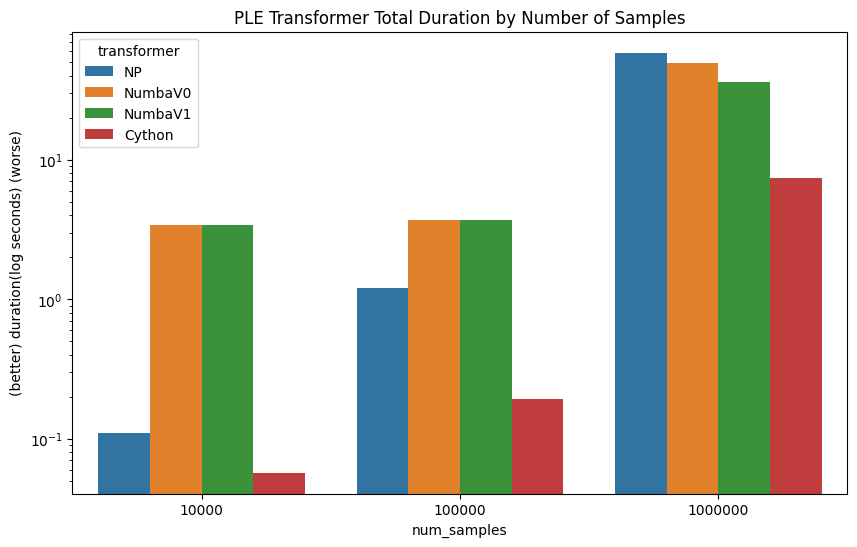

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(x='num_samples', y='total_duration', hue='transformer', data=results_df)
plt.yscale('log')
plt.ylabel('(better) duration(log seconds) (worse)')
plt.title('PLE Transformer Total Duration by Number of Samples')
plt.savefig('ple_transformer_total_duration.png')
plt.show()

1 (-0.4, 0)
2 (0.6, 0)
3 (1.5999999999999999, 0)
4 (-0.19999999999999998, 0)
5 (0.8, 0)
6 (1.7999999999999998, 0)
7 (-2.7755575615628914e-17, 0)
8 (1.0, 0)
9 (2.0, 0)
10 (0.20000000000000004, 0)
11 (1.2, 0)
12 (2.1999999999999997, 0)


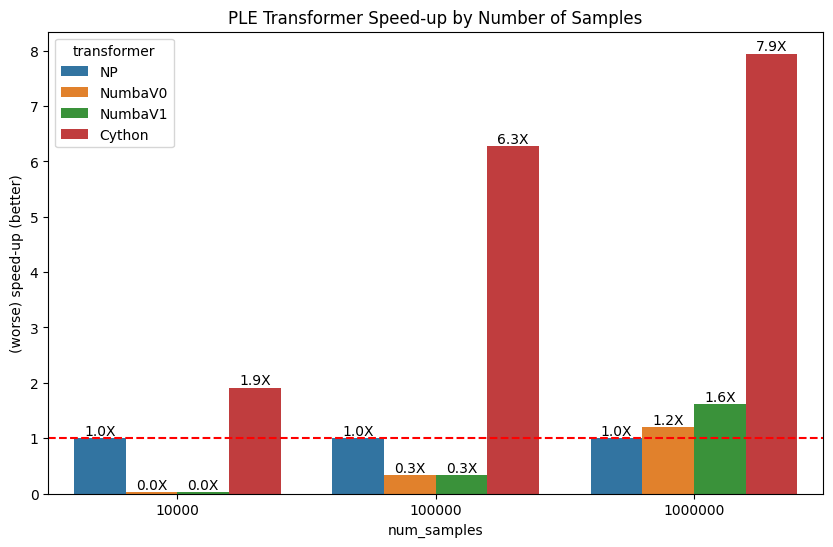

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6), dpi=100)
barplot = sns.barplot(x='num_samples', y='total_speedup', hue='transformer', data=results_df)

plt.axhline(1, color='r', linestyle='--')  # Add this line

# Loop over the bars
p_id = 0
for p in barplot.patches:
    p_id += 1
    if p_id > 12:
        break
    print(p_id, p.get_xy())
    # Get the height of the bar (which is also its value)
    height = p.get_height()
    # Write the value on top of the bar
    barplot.text(x=p.get_x() + p.get_width() / 2., y=height,
                 s='{:.1f}'.format(height) + "X",
                 ha='center', va='bottom')

plt.ylabel('(worse) speed-up (better)')
# plt.yscale('log')
plt.title('PLE Transformer Speed-up by Number of Samples')
plt.savefig('ple_transformer_speedup.png')
plt.show()